In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics

In [44]:
data = pd.read_csv("data.csv")
data

,Nitrogen,Phosphorous,potassium,organiccarbon,pH,temp,yield
0,530,41,284,0.366484,7.643970,29,2446
1,398,49,257,0.623520,6.901007,29,1723
2,437,51,280,0.453510,8.685793,35,2305
3,515,38,241,0.553835,8.466538,14,1476
4,330,51,277,0.674652,8.262446,16,2213
...,...,...,...,...,...,...,...
995,392,41,268,0.705908,8.175878,34,1106
996,390,48,235,0.666421,7.766197,30,1283
997,352,49,237,0.392030,7.010649,26,1548
998,547,38,248,0.522267,7.330033,24,1902


In [45]:
# Remove two columns name is 'C' and 'D'
data =data.drop(['Phosphorous', 'yield'], axis=1)
data

,Nitrogen,potassium,organiccarbon,pH,temp
0,530,284,0.366484,7.643970,29
1,398,257,0.623520,6.901007,29
2,437,280,0.453510,8.685793,35
3,515,241,0.553835,8.466538,14
4,330,277,0.674652,8.262446,16
...,...,...,...,...,...
995,392,268,0.705908,8.175878,34
996,390,235,0.666421,7.766197,30
997,352,237,0.392030,7.010649,26
998,547,248,0.522267,7.330033,24


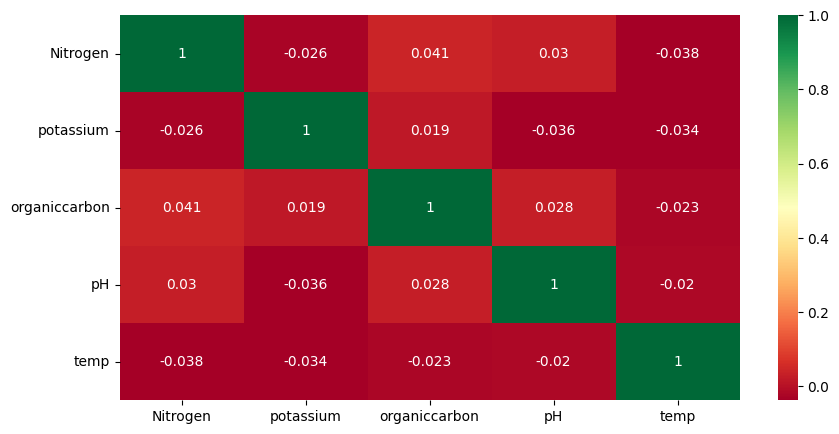

In [46]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10, 5))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [48]:
x = data.iloc[:, [0, 2, 3, 4]].values
y = data.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [49]:
# from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [50]:
from sklearn.preprocessing import MinMaxScaler
# scale features
scaler = MinMaxScaler()
model = scaler.fit(x_train)
x_train = model.transform(x_train)
x_test = model.transform(x_test)

In [51]:
accuracy = {}

In [52]:
print('----- RANDOM FOREST -----')
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
testlabel = rf.predict(x_test)
res = pd.DataFrame(list(zip(y_test, testlabel)), columns=["Actual Values", "Predictions"])

----- RANDOM FOREST -----


In [53]:
rf_acc= rf.score(x_test,y_test)
print("Accuracy: ",rf_acc*100,"%")
# accuracy['Random Forest'] = rf_acc

Accuracy:  1.0 %


In [54]:
knn_classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1, leaf_size = 1)
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)

In [55]:
y_pred = knn_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
knn_acc = accuracy_score(y_test, y_pred)
accuracy["KNN"] = knn_acc
print(knn_acc * 100)

1.3333333333333335


In [56]:
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [57]:
y_pred = dt_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
dt_acc = accuracy_score(y_test, y_pred)
accuracy["Decision Tree"] = dt_acc
print(dt_acc * 100)

3.3333333333333335


In [38]:
lr_classifier = LogisticRegression(penalty='l2', random_state = 0)
lr_classifier.fit(x_train, y_train)

c:\Users\sarwe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [39]:
y_pred = lr_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
lr_acc = accuracy_score(y_test, y_pred)
accuracy["Logistic Regression"] = lr_acc
print(lr_acc * 100)

8.0


In [40]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [41]:
y_pred = nb_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
# print(cm)
nb_acc = accuracy_score(y_test, y_pred)
accuracy["Naive Bayes"] = nb_acc
print(nb_acc)

0.07666666666666666
